<a href="https://colab.research.google.com/github/WahyuKhairi06/BigData_2311531009_Wahyu-Khairi/blob/main/Praktikum%206/praktikum_06_big_data_2311531009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PERTEMUAN 6**

In [1]:
import pandas as pd

#load dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


jumlah kolom nya ada 12 dan 1 label yaitu target.
fitur yang paling relevan mungkin thalach


In [3]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


missing value nya tidak ada.


<Axes: title={'center': 'Distribusi Target'}, xlabel='target'>

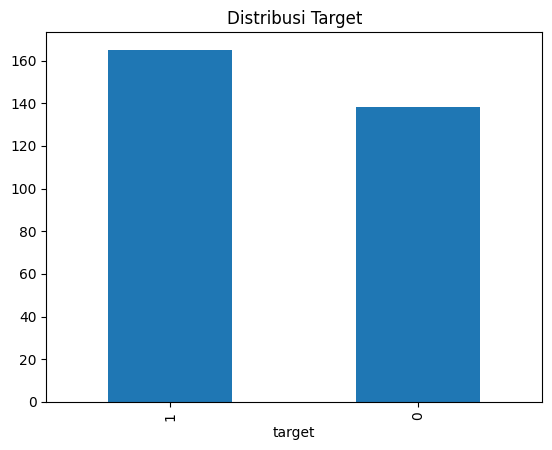

In [4]:
df['target'].value_counts().plot(kind='bar', title='Distribusi Target')

distribusi target nya menunjukkan pasien yang memiliki penyakit jantung lebih banyak, namun selisih nya sedikit dengan pasien yang tidak memiliki penyakit jantung.

dampak selisih yang sedikit ini bisa menyebabkan bias, overfitting dan lain lain.


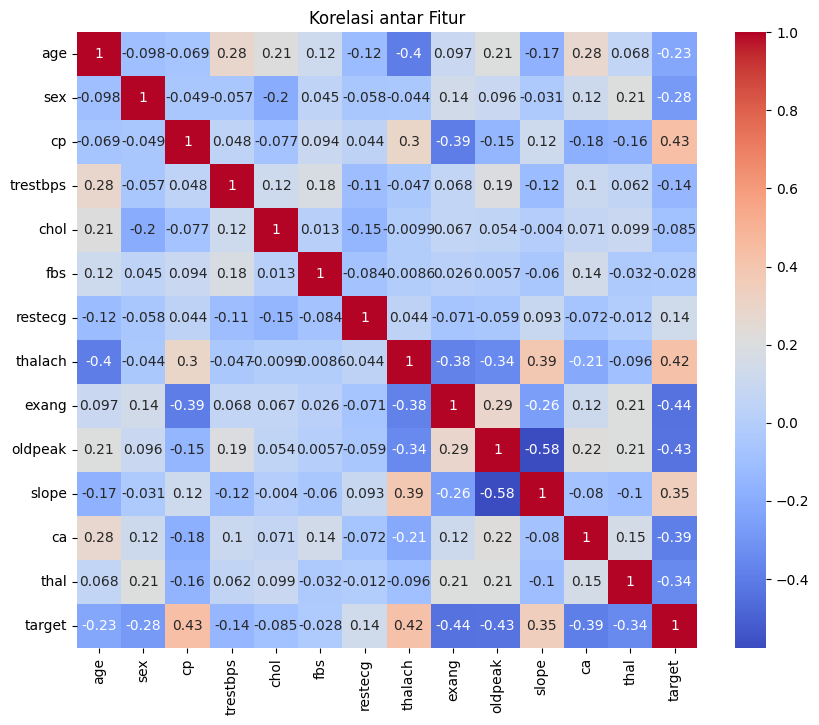

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur')
plt.show()

korelasi fitur yang positif pada heatmap ini adalah cp(chest pain)
korelasi fitur negatif yang tertinggi adalah ( oldpeak dan slope)

menurut saya korelasi ini masuk akal dalam medis karena bisa melihat apakah satu fitur itu berpengaruh dengan fitur lain nya untuk analisa pasien penyakit jantung.


In [7]:
from sklearn.cluster import KMeans

X = df[['age','chol','thalach']]
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

df[['age', 'chol', 'thalach','cluster']].head()

,age,chol,thalach,cluster
0,63,233,150,0
1,37,250,187,0
2,41,204,172,0
3,56,236,178,0
4,57,354,163,1


kelompok hasil cluster nya berbeda dengan label target sebelumnnya

kekurangan nya mungkin akurasi

1. yang mencolok supervised ini sudah ada label atau target. sedangkan unsupervised ini mempelajari pola pada data sebelumnnya.
2. eksplorasi data diperlukan supaya bisa memahami karakteristik data, mencari data yang kosong dan pembersihan data.
3. yang berpengaruh itu CP dan thalach, yang tidak berpangaruh itu oldpeak dan slope.
4. teknologi yang cocok untuk big data adalah